In [2]:
from sklearn.datasets import load_iris                                 # Import the dataset
from sklearn.ensemble import BaggingClassifier                         # Import bagging classifier
from sklearn import tree                                               # Visualize the decision tree
from sklearn.linear_model import LogisticRegression                    # Import Logistic Regression
from sklearn.ensemble import RandomForestClassifier                    # Import random forest classifier
from sklearn.ensemble import AdaBoostClassifier                        # Import Ada boost classifier
from sklearn.ensemble import GradientBoostingClassifier                # Import Gradient boost classifier
from sklearn.tree import DecisionTreeClassifier                        # Import the decision tree classifier
from sklearn.preprocessing import LabelEncoder                         # Encoding categorical data
from sklearn.model_selection import train_test_split                   # Splitting dataset into traning and testing sets
from sklearn.metrics import classification_report, confusion_matrix    # Evaluting the performance of the classifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier                        # Import the decision tree classifier
from sklearn import preprocessing
from sklearn.svm import SVC                                            # Support Vector Machine
# More performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
smoke = pd.read_csv("smoke_detection_iot.csv", index_col= 0)
smoke.dtypes

UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

In [4]:
# replace NaN value by forward fill
smoke.isnull().values.any()

False

<IPython.core.display.Javascript object>


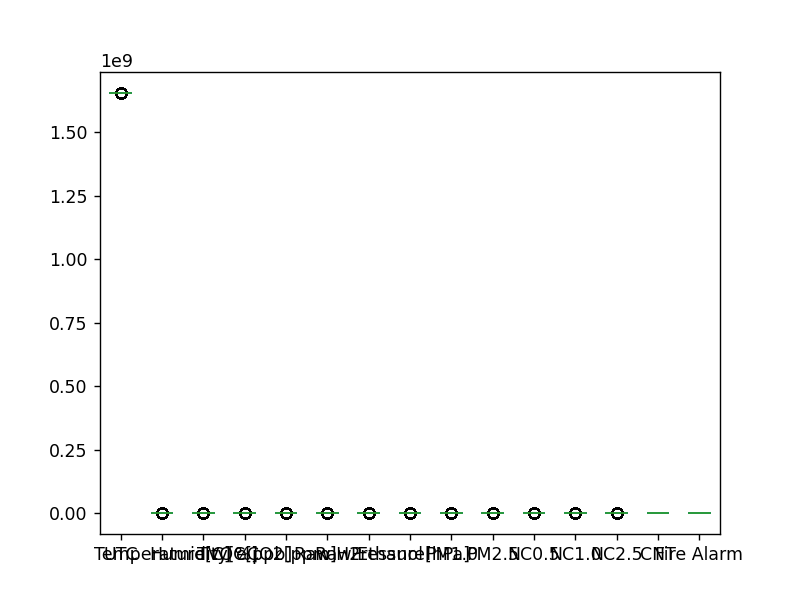

<AxesSubplot:>

In [6]:
%matplotlib notebook
smoke.plot.box()

In [7]:
smoke_cor= smoke.corr()
smoke_cor

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
UTC,1.000000,-0.164174,-0.391907,0.180731,0.132100,-0.151088,0.166555,-0.434375,0.123168,0.105304,0.130288,0.103695,0.083234,-0.251595,-0.389404
Temperature[C],-0.164174,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity[%],-0.391907,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC[ppb],0.180731,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2[ppm],0.132100,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw H2,-0.151088,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw Ethanol,0.166555,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure[hPa],-0.434375,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.123168,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552
PM2.5,0.105304,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.083869,-0.084916


<function matplotlib.pyplot.show(close=None, block=None)>

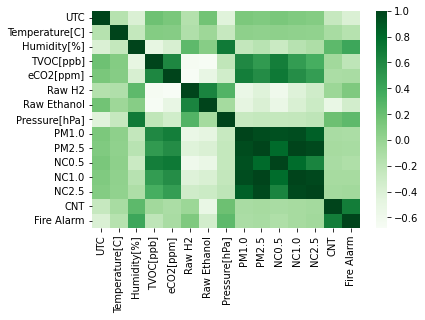

In [8]:
# Visualization - Correlation
%matplotlib inline
import seaborn as sb
sb.heatmap(smoke_cor, cmap ="Greens")
plt.show

<AxesSubplot:xlabel='NC2.5', ylabel='PM1.0'>

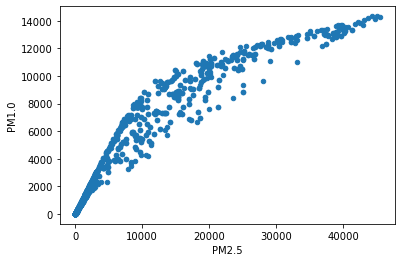

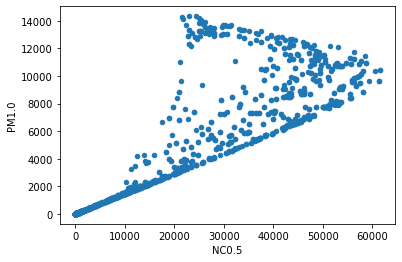

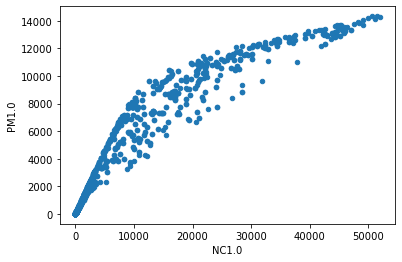

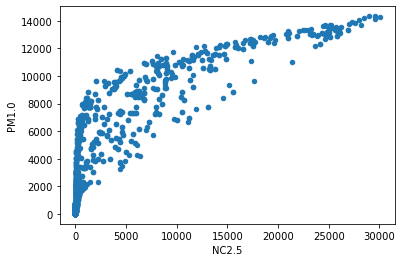

In [9]:
smoke.plot.scatter(x = 'PM2.5', y ='PM1.0')
smoke.plot.scatter(x = 'NC0.5', y ='PM1.0')
smoke.plot.scatter(x = 'NC1.0', y ='PM1.0')
smoke.plot.scatter(x = 'NC2.5', y ='PM1.0')

In [5]:
filter_smoke = smoke.drop('PM1.0', axis = 1)
filter_smoke

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.59,3.92,0.611,0.014,5742,0


In [11]:
# Create class(y) and features(X) from the dataset for Decision Tree

y = filter_smoke['Fire Alarm']
X = filter_smoke.drop('Fire Alarm',axis=1)

[Text(0.5489130434782609, 0.9285714285714286, 'X[12] <= 5743.5\ngini = 0.408\nsamples = 62630\nvalue = [17873, 44757]'),
 Text(0.5054347826086957, 0.7857142857142857, 'X[5] <= 13204.5\ngini = 0.384\nsamples = 24130\nvalue = [17873, 6257]'),
 Text(0.20652173913043478, 0.6428571428571429, 'X[7] <= 933.979\ngini = 0.209\nsamples = 17315\nvalue = [15257, 2058]'),
 Text(0.08695652173913043, 0.5, 'X[12] <= 36.5\ngini = 0.041\nsamples = 1011\nvalue = [21, 990]'),
 Text(0.043478260869565216, 0.35714285714285715, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.13043478260869565, 0.35714285714285715, 'gini = 0.0\nsamples = 990\nvalue = [0, 990]'),
 Text(0.32608695652173914, 0.5, 'X[2] <= 57.445\ngini = 0.122\nsamples = 16304\nvalue = [15236, 1068]'),
 Text(0.21739130434782608, 0.35714285714285715, 'X[12] <= 3319.5\ngini = 0.083\nsamples = 15854\nvalue = [15162, 692]'),
 Text(0.13043478260869565, 0.21428571428571427, 'X[12] <= 4.5\ngini = 0.001\nsamples = 12542\nvalue = [12538, 4]'),
 Text(

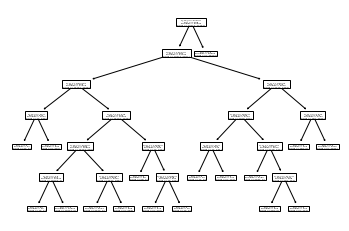

In [12]:
tree_class = DecisionTreeClassifier(max_depth=6, random_state=37)
tree_class.fit(X, y)
tree.plot_tree(tree_class)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 37)

tree_class.fit(X_train, y_train)
y_pred = tree_class.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 5376     1]
 [    4 13408]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5377
           1       1.00      1.00      1.00     13412

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



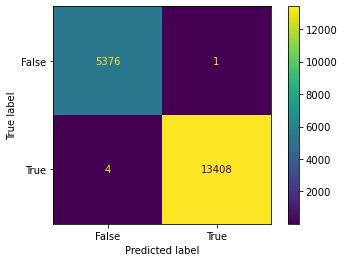

In [14]:
confu_mat = confusion_matrix(y_test, y_pred)
confumat_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confu_mat, display_labels = [False, True])

confumat_display.plot()
plt.show()

Accuracy: 0.999734
Precision: 0.999925
Recall: 0.999702
F1 score: 0.999814
ROC AUC: 0.999830


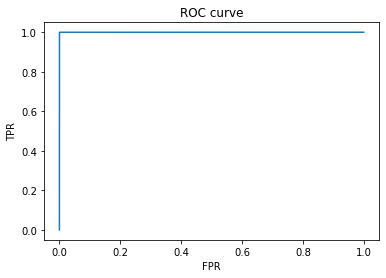

In [15]:
# accuracy: (tp + tn) / (p + n)
accuracy_decision = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy_decision)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
    
# ROC AUC
y_hat = tree_class.predict_proba(X_test)
auc = roc_auc_score(y_test, y_hat[:,1])
print('ROC AUC: %f' % auc)

fpr_deci, tpr_deci, _ = metrics.roc_curve(y_test, y_hat[:,1])

plt.clf()
plt.plot(fpr_deci, tpr_deci)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [16]:
model = DecisionTreeClassifier()
max_depth = [2,4,6]
max_leaf_node = [4,6,8,10]
min_impurity_decrease = [0.01,0.05,0.1,1]
#param_dict = {"max_depth":range(1,10),"max_depth_node":range(1,10),"min_impurity_decrease": list(min_impurity_decrease)}

# define grid search
grid = dict(max_depth=max_depth,min_impurity_decrease=min_impurity_decrease, max_leaf_nodes=max_leaf_node)

grid_search = GridSearchCV(model, param_grid =grid, cv=10, n_jobs=-1)
grid_result = grid_search.fit(X, y)

In [17]:
grid_result.best_params_

{'max_depth': 4, 'max_leaf_nodes': 6, 'min_impurity_decrease': 0.01}

In [18]:
# Create class(y) and features(X) from the dataset for logistic

b = filter_smoke['Fire Alarm'] # assigned dependent variables
T = filter_smoke.drop('Fire Alarm',axis=1) # drop that column which is selected for dependent value. Using axis for
# how we drop the value

T_train, T_test, b_train, b_test = train_test_split(T, b, test_size=0.2, random_state=73)

In [19]:
# scale numeric columns and perform the logistic regression

logistic_pipeline = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=10000)) # StandardScaler is used to scale numeric value

In [20]:
# Logistic Regression

logic_class = logistic_pipeline
logic_class.fit(T_train, b_train) #train the data
b_pred = logic_class.predict(T_test) #predict the independent variables testing data for dependent variables value

In [21]:
print(confusion_matrix(b_test, b_pred)) # Confusion Matrix where it identifies what is real-true/false-positive/ground-false/true-negative
print(classification_report(b_test, b_pred))

[[3440   66]
 [  58 8962]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3506
           1       0.99      0.99      0.99      9020

    accuracy                           0.99     12526
   macro avg       0.99      0.99      0.99     12526
weighted avg       0.99      0.99      0.99     12526



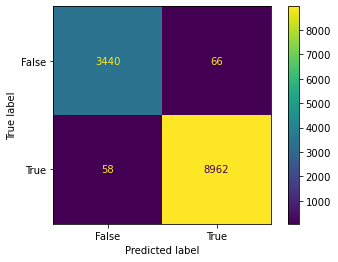

In [22]:
conf_mat = confusion_matrix(b_test, b_pred)
confmat_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [False, True])

confmat_display.plot()
plt.show()

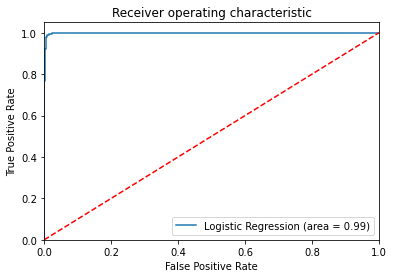

In [23]:
logit_roc_auc = roc_auc_score(b_test, logic_class.predict(T_test))
fpr, tpr, thresholds = roc_curve(b_test, logic_class.predict_proba(T_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [24]:
# accuracy: (tp + tn) / (p + n)
accuracy_logic = accuracy_score(b_test, b_pred)
print('Accuracy: %f' % accuracy_logic)
# precision tp / (tp + fp)
precision_logic = precision_score(b_test, b_pred)
print('Precision: %f' % precision_logic)
# recall: tp / (tp + fn)
recall_logic = recall_score(b_test, b_pred)
print('Recall: %f' % recall_logic)
# f1: 2 tp / (2 tp + fp + fn)
f1_logic = f1_score(b_test, b_pred)
print('F1 score: %f' % f1_logic)

Accuracy: 0.990101
Precision: 0.992689
Recall: 0.993570
F1 score: 0.993129


In [25]:
model = LogisticRegression(max_iter =4000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [1.0, 0.1, 0.01]


# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(T, b)

C:\Users\ghost\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ghost\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ghost\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ghost\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [26]:
grid_result.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [6]:
#Support Vector Machine

# Create class(y) and features(X) from the dataset for logistic

a = filter_smoke['Fire Alarm'] # assigned dependent variables
E = filter_smoke.drop('Fire Alarm',axis=1) # drop that column which is selected for dependent value. Using axis for
# how we drop the value

E_train, E_test, a_train, a_test = train_test_split(E, a, test_size=0.2, random_state=53)

In [7]:
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svc",  SVC(C = 0.1, kernel='linear', gamma='auto', probability=True)),
    ])

In [8]:
svm = SVC()
svm_clf.fit(E_train, a_train)

#svm_clf.fit(E_train, a_train)
a_pred = svm_clf.predict(E_test)

print(confusion_matrix(a_test, a_pred))
print(classification_report(a_test, a_pred))

[[3409   69]
 [  62 8986]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3478
           1       0.99      0.99      0.99      9048

    accuracy                           0.99     12526
   macro avg       0.99      0.99      0.99     12526
weighted avg       0.99      0.99      0.99     12526



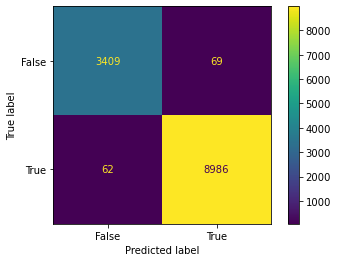

In [9]:
cfm = confusion_matrix(a_test, a_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy: 0.989542
Precision: 0.992380
Recall: 0.993148
F1 score: 0.992764
ROC AUC: 0.998376


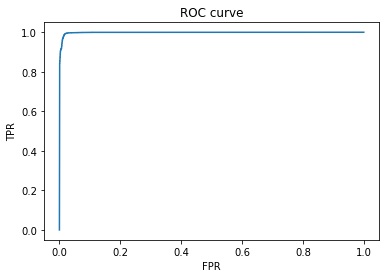

In [10]:
# accuracy: (tp + tn) / (p + n)
accuracy_svm = accuracy_score(a_test, a_pred)
print('Accuracy: %f' % accuracy_svm)
# precision tp / (tp + fp)
precision_svm = precision_score(a_test, a_pred)
print('Precision: %f' % precision_svm)
# recall: tp / (tp + fn)
recall_svm = recall_score(a_test, a_pred)
print('Recall: %f' % recall_svm)
# f1: 2 tp / (2 tp + fp + fn)
f1_svm = f1_score(a_test, a_pred)
print('F1 score: %f' % f1_svm)
 
    
# ROC AUC
a_hat = svm_clf.predict_proba(E_test)
auc_svm = roc_auc_score(a_test, a_hat[:,1])
print('ROC AUC: %f' % auc_svm)

fpr_svm, tpr_svm, _ = metrics.roc_curve(a_test, a_hat[:,1])

plt.clf()
plt.plot(fpr_svm, tpr_svm)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [11]:
param_grid = {'C': [0.1,1, 10,0.01], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [12]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

grid.fit(E_train,a_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 5.8min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 6.5min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 5.9min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 5.6min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 5.5min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  37.4s
[CV] END .....................C=0.1, gamma=1, k

C:\Users\ghost\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ghost\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ghost\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 269, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 0.01],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [14]:
final_model = grid.best_estimator_
train_predictions = final_model.predict(E_train)
test_predictions = final_model.predict(E_test)

print('Train Score:', accuracy_score(train_predictions, a_train)) # .99
print('Test Score:', accuracy_score(test_predictions, a_test)) # .8

Train Score: 0.9999201660546064
Test Score: 0.9663100750439086


In [15]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}